In [1]:
# pre-processing data
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
# standardize the Data
from sklearn.preprocessing import StandardScaler
# PCA
from sklearn.decomposition import PCA
# draw graph
import matplotlib.pyplot as plt
%matplotlib inline

## LOAD DATA

- https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-1%E8%AC%9B-%E5%A6%82%E4%BD%95%E7%8D%B2%E5%8F%96%E8%B3%87%E6%96%99-sklearn%E5%85%A7%E5%BB%BA%E8%B3%87%E6%96%99%E9%9B%86-baa8f027ed7b

In [2]:
# load the wine data and get the dictionary key
wine = load_wine()
wine.keys()

dict_keys(['DESCR', 'data', 'target_names', 'feature_names', 'target'])

In [3]:
print(wine['target_names'])

['class_0' 'class_1' 'class_2']


In [4]:
print(wine['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
print(wine['data'])

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [5]:
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
# see the wine data information
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
# get the variables and data
variables = wine['feature_names']
datas = wine['data']
# build the dataframe
wine_df = pd.DataFrame(datas, columns = variables )
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
# get our target y
target = wine['target']
y = pd.DataFrame(target, columns = ['target_names'] )
y.head()

,target_names
0,0
1,0
2,0
3,0
4,0


## Standardize the Data

##### 13 Variables'  in chinese.
- 酒精、蘋果酸、灰燼、灰燼的鹼度、鎂、總酚、黃烷類、Nonflavanoid酚、前花青素、顏色強度、顏色、OD280/OD315被稀釋的酒、脯氨酸

In [10]:
# Standardizing the features
std_wine = StandardScaler().fit_transform(wine_df)
std_wine_df = pd.DataFrame(std_wine, columns = variables )
std_wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## PCA Projection to 2D

##### In general, we do the scree plot first  to choose the number of components in PCA.
##### To visualize the PCA , just choose 2 components in this demo, so the students can easily get the point.

- https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

- The original data has 13 columns. 
- In this section, the code projects the original data which is 13 dimensional into 2 dimensions. 
- I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [11]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(std_wine)
principal_df = pd.DataFrame(data = principalComponents
                          , columns = ['principal component 1', 'principal component 2'])
principal_df.head()

,principal component 1,principal component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [12]:
final_df = pd.concat([principal_df, y], axis = 1)
final_df.head()

,principal component 1,principal component 2,target_names
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


## Visualize 2D Projection

- This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

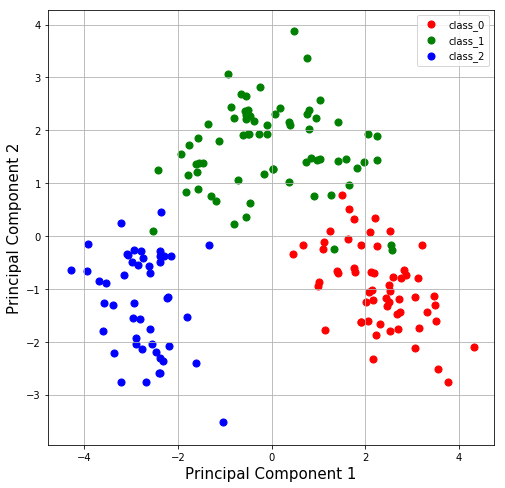

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target_names'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'],
              final_df.loc[indicesToKeep, 'principal component 2'],
              c = color,
              s = 50)
ax.legend(list(wine.target_names))
ax.grid()

In [14]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## Remark：Scree Plot
- https://etav.github.io/python/scikit_pca.html

##### Step 1: Standardize the Dataset

- We had do it at the top.

##### Step 2: Create a Covariance Matrix

In [16]:
#we have 13 features
covar_matrix = PCA(n_components = 13)

##### Step 3: Calculate Eigenvalues

In [17]:
#calculate variance ratios
covar_matrix.fit(std_wine)
variance = covar_matrix.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [18]:
#cumulative sum of variance explained with [n] features
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var

array([36.2, 55.4, 66.5, 73.6, 80.2, 85.1, 89.3, 92. , 94.2, 96.1, 97.8,
       99.1, 99.9])

- Step 4, 5 & 6: Sort & Select

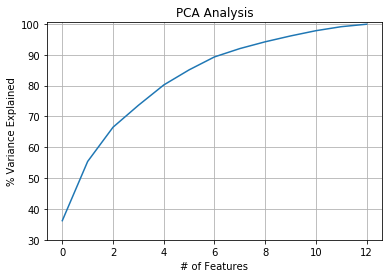

In [19]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.grid()
plt.plot(var)